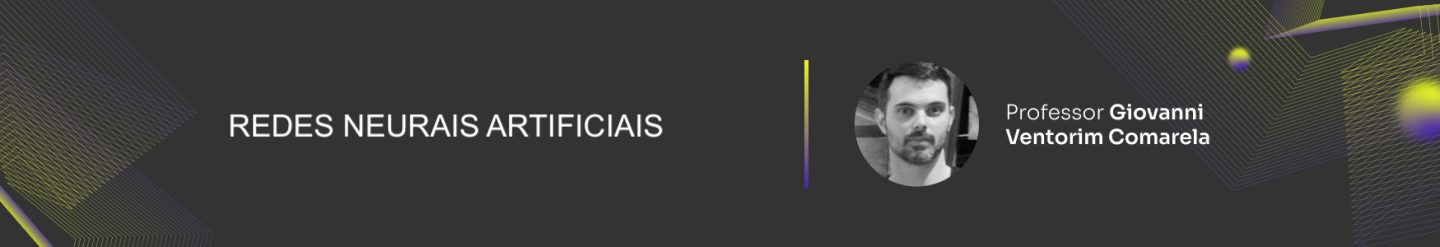

# Laboratório 2

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo das três primeiras semanas da disciplina.

Para isso, novamente, vamos utilizar o conjunto de dados [``Fashion MNIST``](https://keras.io/api/datasets/fashion_mnist/).

O conjunto de dados contém imagens de 10 categorias de peças de vestuário.

São 70 mil imagens de tamanho 28x28 (píxeis) em escala de cinza, distribuídas nas 10 categorias.

## Obtenção dos dados

Para obter o conjunto de dados, podemos utilizar a própria biblioteca `Keras`.

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow import keras
from keras.datasets import fashion_mnist
sns.set()

In [45]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Observe que o conjunto de dados já vem dividido em porções de treinamento e teste. Assim, essa é uma etapa com a qual você não vai precisar se preocupar. A seguir, o tamanho de cada porção do conjunto de dados.

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Veja que cada elemento do conjunto de dados é uma matriz com 28 linhas e 28 colunas. Cada matriz representa uma imagem, em escala de cinza, de uma peça de vestuário. São 10 tipos de peças no conjunto de dados, i.e., são 10 classes.

As figuras abaixo apresentam as classes e os tipos de peças de vestuário contidas no conjunto de dados.

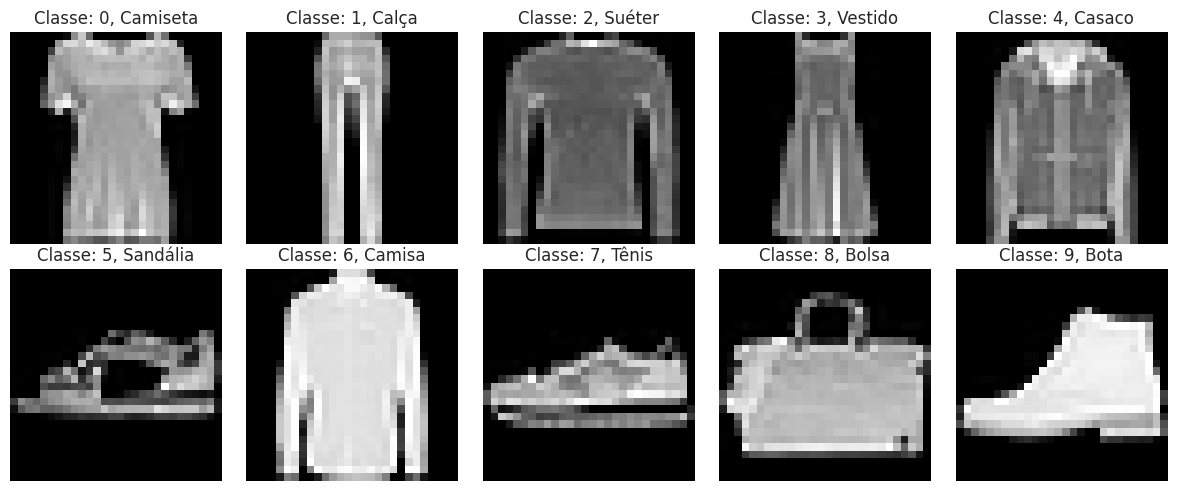

In [47]:
#@title
labels = ["Camiseta", "Calça", "Suéter", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    img = X_train[y_train == i][3]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Classe: %d, %s" % (i, labels[i]))
    plt.axis('off')
plt.tight_layout();

Como o conjunto de dados é relativamente grande, iremos trabalhar apenas com uma porção do conjunto de treinamento, para que o treinamento dos modelos não tome muito tempo. O Código abaixo já faz essa amostra para vocês.

In [48]:
# não modifique nada aqui

import random

sampleSize = 20000 # um terço dos dados originais
random.seed(42)
sampleIndex = random.sample(list(np.arange(0, X_train.shape[0])), sampleSize)

X_train = X_train[sampleIndex]
y_train = y_train[sampleIndex]

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Parte I: Preparação dos Dados [10 pontos - Todos os itens têm o mesmo valor]

### Item 1.1

Cada imagem dos conjuntos de treino e teste é uma matriz 28x28. Como visto na disciplina, MLPs precisam que a entrada seja um vetor, não uma matriz.

Transforme os elementos dos conjuntos de treino e teste em objetos de tamanho 784 (28 * 28 = 784).

**Dica:** use a função [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [49]:
# Escreva sua resposta aqui
# o "-1" calcula automaticamente o numero de colunas necessarias dado a proporção da matriz
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [50]:
print(X_train.shape)
print(X_test.shape)

(20000, 784)
(10000, 784)


Antes de continuar, é importante que saída da célula de código acima seja como mostrado na figura abaixo.

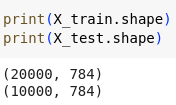

Após isso, é importante converter os dados para ponto flutuante e normalizar os valores. O código abaixo já faz isso para você.

In [51]:
# não modifique aqui

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### Item 1.2

Separe 30% do conjunto de treinamento para ser utilizado como conjunto de validação. Ou seja, 70% dos dados de treinamento serão utilizados para treinar o modelo e os demais 30% serão utilizados para acompanhar o treinamento.

In [52]:
# Escreva sua resposta aqui.
from sklearn.model_selection import train_test_split
X_train_val, X_validation, y_train_val, y_validation = train_test_split(X_train, y_train, test_size = 0.30,
                                                    random_state = 7)

### Item 1.3

Codifique os rótulos do conjunto de treinamento e do conjunto de validação utilizando a codificação *one-hot*.

**Dica:** use a classe [CategoryEncoding](https://keras.io/api/layers/preprocessing_layers/categorical/category_encoding/) do `Keras`.

In [53]:
# Escreva sua resposta aqui
encoder = keras.layers.CategoryEncoding(
  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_train_val)),
  output_mode="one_hot"
)

y_train_encoded = encoder(y_train_val)


encoder = keras.layers.CategoryEncoding(
  # Quantidade de classes unicas
  num_tokens=len(np.unique(y_validation)),
  output_mode="one_hot"
)

y_validation_encoded = encoder(y_validation)

## Parte II: Modelo base [20 pontos - Todos os itens têm o mesmo valor]

### Item 2.1

Defina um modelo, em Keras, com duas camadas ocultas, cada uma com 64 unidades. Como função de ativação na camada de saída, utilize a softmax. Como função de ativação nas camadas ocultas, utilize a ReLU.

In [54]:
# Escreva sua resposta aqui
model = keras.Sequential([
    keras.layers.Input((784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(units=10, activation="softmax")
])

### Item 2.2

Utilize o método [compile](https://keras.io/api/models/model_training_apis/) para preparar o modelo e definir a função de perda como sendo a Entropia Cruzada Categórica (*Categorical Cross-Entropy*). Além disso, você deve definir o $F1$-*score* como métrica a ser computada ao longo das épocas de treinamento.

In [55]:
# Escreva sua resposta aqui
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

### Item 2.3

Treine o modelo utilizando o método [fit](https://keras.io/api/models/model_training_apis/). Além dos dados de treinamento, informe:
- `epochs = 500`;
- `verbose` = 2 (para você poder acompanhar o andamento do processo de treinamento);
- `batch_size` = 128;
- A porção dos dados utilizada para validação, por meio do parâmetro `validation_data`.

Lembre de salvar a saída do método em uma variável, para uso no próximo Item.

In [56]:
# Escreva sua resposta aqui
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128)

Epoch 1/500


110/110 - 1s - 9ms/step - f1_score: 0.6913 - loss: 0.8858 - val_f1_score: 0.7564 - val_loss: 0.6533
Epoch 2/500
110/110 - 0s - 3ms/step - f1_score: 0.7886 - loss: 0.5738 - val_f1_score: 0.7555 - val_loss: 0.5963
Epoch 3/500
110/110 - 0s - 3ms/step - f1_score: 0.8166 - loss: 0.5027 - val_f1_score: 0.7055 - val_loss: 0.7419
Epoch 4/500
110/110 - 0s - 4ms/step - f1_score: 0.8297 - loss: 0.4662 - val_f1_score: 0.8240 - val_loss: 0.4854
Epoch 5/500
110/110 - 0s - 4ms/step - f1_score: 0.8427 - loss: 0.4359 - val_f1_score: 0.8373 - val_loss: 0.4458
Epoch 6/500
110/110 - 0s - 4ms/step - f1_score: 0.8489 - loss: 0.4120 - val_f1_score: 0.8431 - val_loss: 0.4304
Epoch 7/500
110/110 - 0s - 3ms/step - f1_score: 0.8583 - loss: 0.3942 - val_f1_score: 0.8446 - val_loss: 0.4319
Epoch 8/500
110/110 - 0s - 3ms/step - f1_score: 0.8625 - loss: 0.3762 - val_f1_score: 0.8417 - val_loss: 0.4416
Epoch 9/500
110/110 - 0s - 3ms/step - f1_score: 0.8670 - loss: 0.3623 - val_f1_score: 0.8315 - val_loss: 0.4704
Epoc

### Item 2.4

Utilizando a saída do método `fit`, faça dois gráficos da seguinte maneira:
- O primeiro deve conter a evolução da função de perda/custo ao longo do treinamento (i.e., épocas) para os conjuntos de validação e treino.
- O segundo deve conter a evolução da métrica $F1$-*score* ao longo do treinamento (i.e., épocas) para os conjuntos de validação e treino.

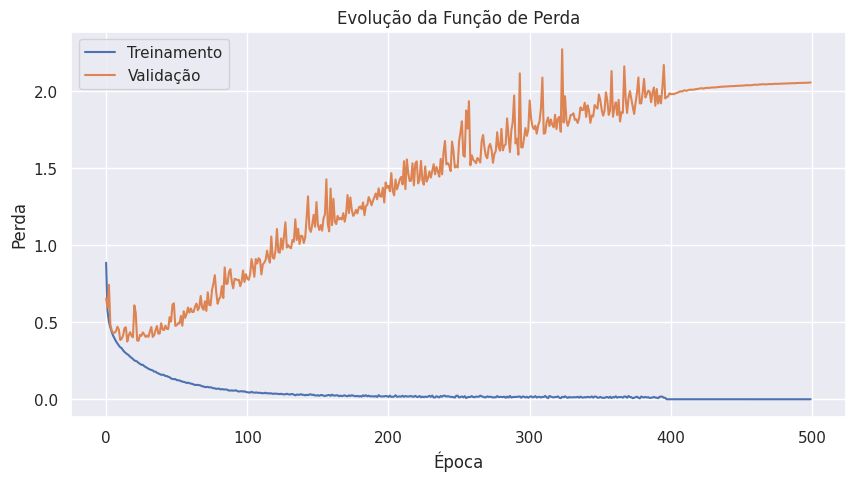

In [79]:
# Escreva sua resposta aqui

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

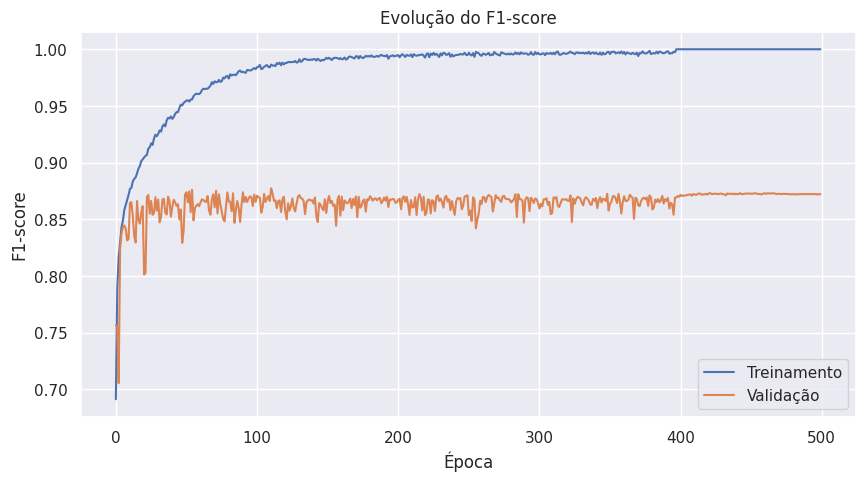

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

### Item 2.5

Utilize o modelo treinado para prever os rótulos dos elementos do conjunto de teste. Além disso, utilize o método `classification_report`, da biblioteca `scikit-learn` para avaliar a qualidade do modelo no conjunto de teste.

In [82]:
from sklearn.metrics import classification_report

# Escreva sua resposta aqui
phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.76      0.80      0.78      1000
           3       0.86      0.88      0.87      1000
           4       0.79      0.78      0.78      1000
           5       0.93      0.92      0.93      1000
           6       0.69      0.67      0.68      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.95      0.95      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Parte III: Adicionando Early Stopping [20 pontos - Todas as partes têm o mesmo valor]

Repita o experimento da Parte II, com um modelo seguindo a mesma arquitetura. Você deve executar os mesmos passos. No entanto, além disso, adicione o mecanismo de [*Early Stopping*](https://keras.io/api/callbacks/early_stopping/). Na definição desse mecanismo, use:
- `val_loss` como métrica a ser monitorada;
- `start_from_epoch` = 30;
- `restore_best_weights` = `True`; e
- `patience` = 50.

In [ ]:
# escreva sua resposta aqui
# definição do mecanismo de early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                           start_from_epoch = 30,
                                           restore_best_weights = True,
                                           patience = 50)


In [85]:
# escreva sua resposta aqui
# definição do modelo
model = keras.Sequential([
    keras.layers.Input((784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(units=10, activation="softmax")
])

In [86]:
# escreva sua resposta aqui
# uso do método compile
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

In [87]:
# escreva sua resposta aqui
# uso do método fit. Lembre de usar o mecanismo de early stopping.
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128, callbacks = [early_stop])

Epoch 1/500
110/110 - 1s - 7ms/step - f1_score: 0.6980 - loss: 0.8669 - val_f1_score: 0.7395 - val_loss: 0.6732
Epoch 2/500
110/110 - 0s - 3ms/step - f1_score: 0.7939 - loss: 0.5684 - val_f1_score: 0.7298 - val_loss: 0.6837
Epoch 3/500
110/110 - 0s - 3ms/step - f1_score: 0.8175 - loss: 0.5052 - val_f1_score: 0.8020 - val_loss: 0.5394
Epoch 4/500
110/110 - 0s - 3ms/step - f1_score: 0.8337 - loss: 0.4656 - val_f1_score: 0.8051 - val_loss: 0.5254
Epoch 5/500
110/110 - 0s - 3ms/step - f1_score: 0.8429 - loss: 0.4353 - val_f1_score: 0.8098 - val_loss: 0.4975
Epoch 6/500
110/110 - 0s - 3ms/step - f1_score: 0.8507 - loss: 0.4151 - val_f1_score: 0.8490 - val_loss: 0.4204
Epoch 7/500
110/110 - 0s - 3ms/step - f1_score: 0.8589 - loss: 0.3920 - val_f1_score: 0.8342 - val_loss: 0.4550
Epoch 8/500
110/110 - 0s - 3ms/step - f1_score: 0.8647 - loss: 0.3801 - val_f1_score: 0.8322 - val_loss: 0.4672
Epoch 9/500
110/110 - 0s - 3ms/step - f1_score: 0.8677 - loss: 0.3622 - val_f1_score: 0.8619 - val_loss:

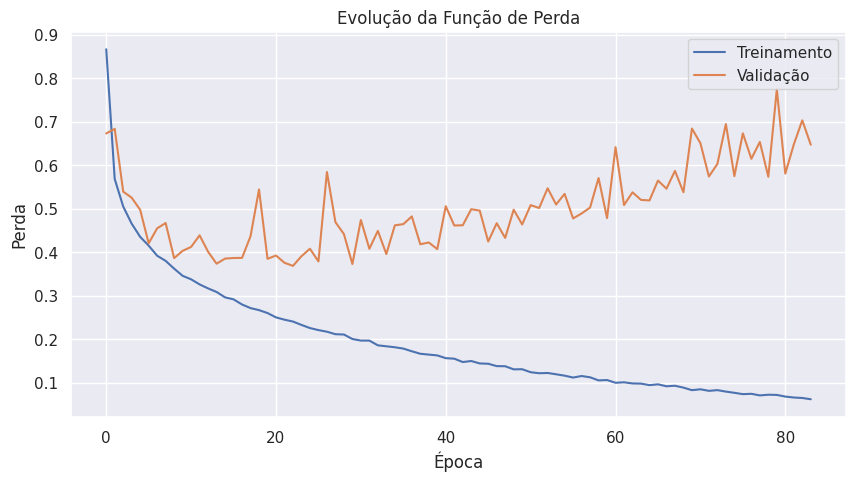

In [88]:
# escreva sua resposta aqui
# gráfico da função de perda e f1-score para os conjuntos de validação e treinamento

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

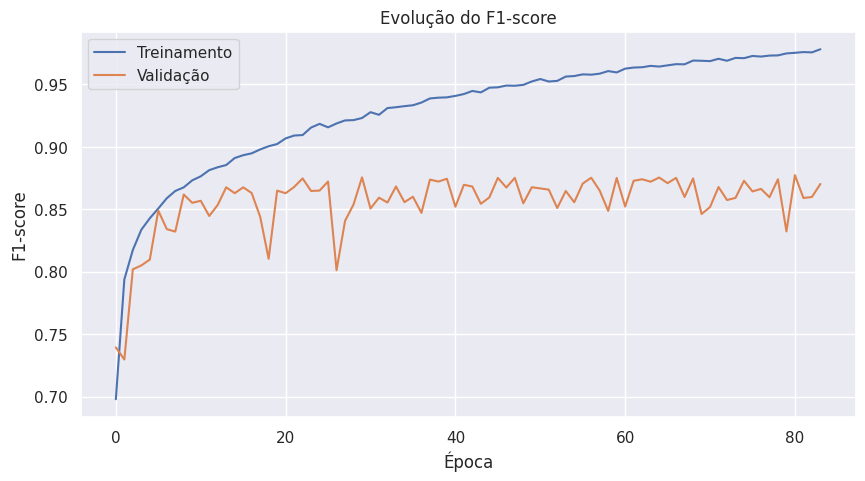

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Escreva sua resposta aqui
# predição e avaliação no conjunto de teste com classification_report
phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.88      0.62      0.73      1000
           3       0.85      0.88      0.86      1000
           4       0.71      0.86      0.78      1000
           5       0.95      0.94      0.94      1000
           6       0.66      0.66      0.66      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Parte IV: Adicionando Dropout [20 pontos - Todas as partes têm o mesmo valor]

Repita o experimento da Parte III, com um modelo seguindo a mesma arquitetura e com o mesmo mecanismo de *Early Stopping*. No entanto, além disso, adicione uma camada de [*Dropout*](https://keras.io/2/api/layers/regularization_layers/dropout/) após cada camada oculta. Use $p = 0.2$ (taxa de unidades a serem "desativadas" de 20%) para cada camada de *Dropout*.

In [91]:
# escreva sua resposta aqui
# definição do mecanismo de early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                           start_from_epoch = 30,
                                           restore_best_weights = True,
                                           patience = 50)

In [92]:
# escreva sua resposta aqui
# definição do modelo. Lembre de adicionar as camadas de Dropout aqui
model = keras.Sequential([
    keras.layers.Input((784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(units=10, activation="softmax")
])


In [93]:
# escreva sua resposta aqui
# uso do método compile
model.compile(
    loss = "categorical_crossentropy",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)

In [94]:
# escreva sua resposta aqui
# uso do método fit. Lembre de usar o mecanismo de early stopping.
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128, callbacks = [early_stop])

Epoch 1/500
110/110 - 1s - 8ms/step - f1_score: 0.6180 - loss: 1.0602 - val_f1_score: 0.7306 - val_loss: 0.6747
Epoch 2/500
110/110 - 0s - 3ms/step - f1_score: 0.7567 - loss: 0.6732 - val_f1_score: 0.8039 - val_loss: 0.5440
Epoch 3/500
110/110 - 0s - 3ms/step - f1_score: 0.7934 - loss: 0.5794 - val_f1_score: 0.8331 - val_loss: 0.4706
Epoch 4/500
110/110 - 0s - 3ms/step - f1_score: 0.8103 - loss: 0.5274 - val_f1_score: 0.8331 - val_loss: 0.4625
Epoch 5/500
110/110 - 0s - 3ms/step - f1_score: 0.8222 - loss: 0.4970 - val_f1_score: 0.8378 - val_loss: 0.4495
Epoch 6/500
110/110 - 0s - 3ms/step - f1_score: 0.8258 - loss: 0.4711 - val_f1_score: 0.8367 - val_loss: 0.4518
Epoch 7/500
110/110 - 0s - 3ms/step - f1_score: 0.8376 - loss: 0.4447 - val_f1_score: 0.8462 - val_loss: 0.4252
Epoch 8/500
110/110 - 0s - 3ms/step - f1_score: 0.8393 - loss: 0.4359 - val_f1_score: 0.8493 - val_loss: 0.4173
Epoch 9/500
110/110 - 0s - 3ms/step - f1_score: 0.8499 - loss: 0.4157 - val_f1_score: 0.8399 - val_loss:

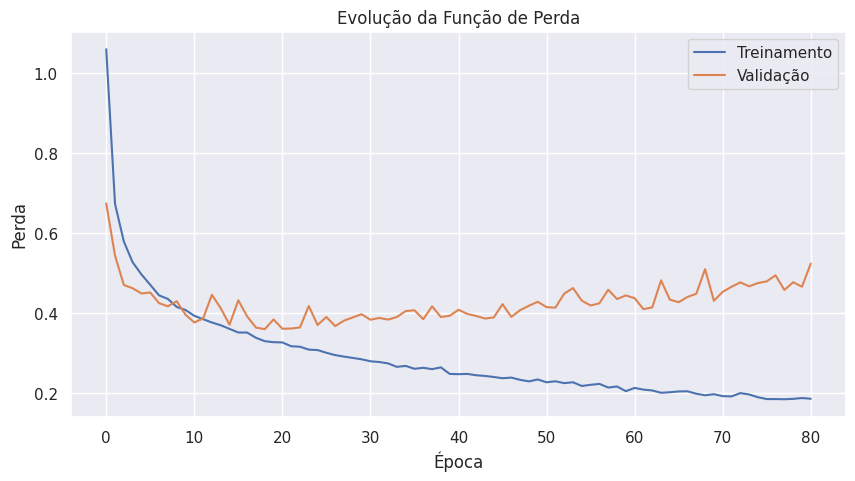

In [95]:
# escreva sua resposta aqui
# gráfico da função de perda e f1-score para os conjuntos de validação e treinamento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

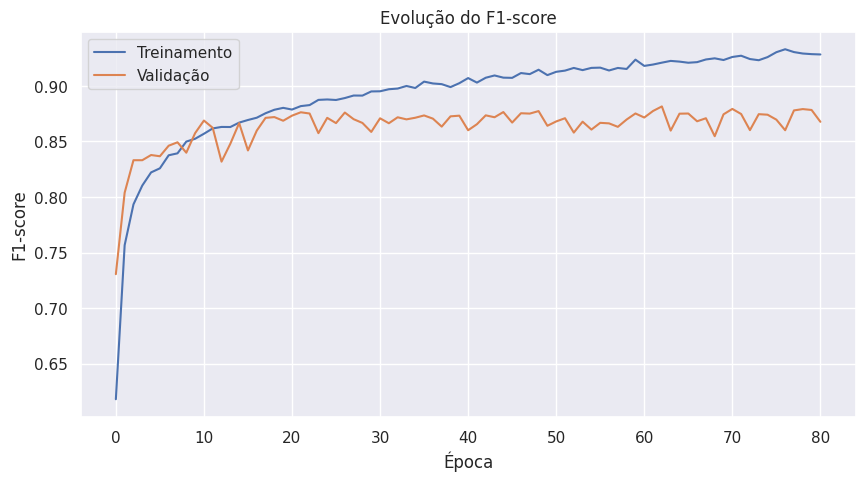

In [96]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# Escreva sua resposta aqui
# predição e avaliação no conjunto de teste com classification_report
phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.76      0.77      1000
           3       0.83      0.91      0.87      1000
           4       0.77      0.77      0.77      1000
           5       0.96      0.94      0.95      1000
           6       0.74      0.56      0.63      1000
           7       0.90      0.96      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Parte V: Testando um otimizador diferente [20 pontos - Todas as partes têm o mesmo valor]

Repita o experimento da Parte IV, com um modelo seguindo a mesma arquitetura, com o mesmo mecanismo de *Early Stopping* e *Dropout*. No entanto, além disso, utilize o otimizador [Adam](https://keras.io/api/optimizers/adam/) (Exemplo [aqui](https://keras.io/api/optimizers/)) para realizar o treinamento do modelo.

In [99]:
# escreva sua resposta aqui
# definição do mecanismo de early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',
                                           start_from_epoch = 30,
                                           restore_best_weights = True,
                                           patience = 50)

In [100]:
# escreva sua resposta aqui
# definição do modelo. Lembre de adicionar as camadas de Dropout aqui
model = keras.Sequential([
    keras.layers.Input((784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate = 0.2),
    keras.layers.Dense(units=10, activation="softmax")
])

In [101]:
# escreva sua resposta aqui
# uso do método compile. Lembre de informar o otimizador Adam aqui
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "Adam",
    metrics=[
        keras.metrics.F1Score(average = 'weighted'),
    ]
)


In [102]:
# escreva sua resposta aqui
# uso do método fit. Lembre de usar o mecanismo de early stopping.
history = model.fit(X_train_val, y_train_encoded, validation_data = (X_validation, y_validation_encoded),  epochs = 500, verbose = 2, batch_size=128, callbacks = [early_stop])

Epoch 1/500
110/110 - 1s - 10ms/step - f1_score: 0.5914 - loss: 1.1289 - val_f1_score: 0.7533 - val_loss: 0.6541
Epoch 2/500
110/110 - 0s - 3ms/step - f1_score: 0.7579 - loss: 0.6727 - val_f1_score: 0.8172 - val_loss: 0.5198
Epoch 3/500
110/110 - 0s - 3ms/step - f1_score: 0.7923 - loss: 0.5866 - val_f1_score: 0.8276 - val_loss: 0.4918
Epoch 4/500
110/110 - 0s - 4ms/step - f1_score: 0.8121 - loss: 0.5257 - val_f1_score: 0.8304 - val_loss: 0.4821
Epoch 5/500
110/110 - 0s - 4ms/step - f1_score: 0.8254 - loss: 0.4898 - val_f1_score: 0.8461 - val_loss: 0.4326
Epoch 6/500
110/110 - 0s - 4ms/step - f1_score: 0.8364 - loss: 0.4579 - val_f1_score: 0.8516 - val_loss: 0.4187
Epoch 7/500
110/110 - 0s - 4ms/step - f1_score: 0.8411 - loss: 0.4403 - val_f1_score: 0.8570 - val_loss: 0.4069
Epoch 8/500
110/110 - 0s - 3ms/step - f1_score: 0.8497 - loss: 0.4259 - val_f1_score: 0.8520 - val_loss: 0.4179
Epoch 9/500
110/110 - 0s - 3ms/step - f1_score: 0.8537 - loss: 0.4119 - val_f1_score: 0.8579 - val_loss

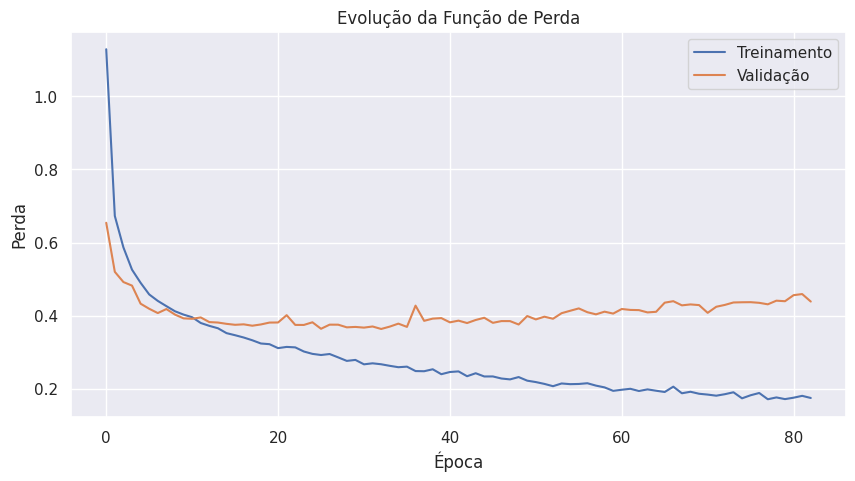

In [103]:
# escreva sua resposta aqui
# gráfico da função de perda e f1-score para os conjuntos de validação e treinamento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Função de Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

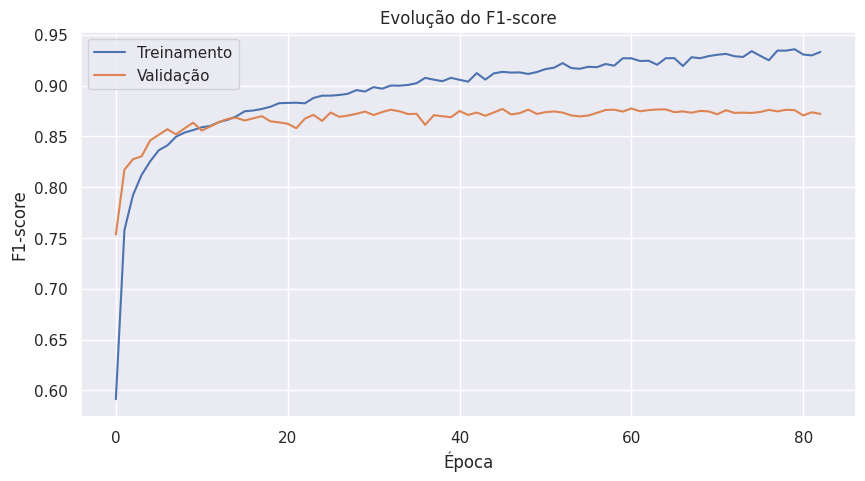

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['f1_score'], label='Treinamento')
plt.plot(history.history['val_f1_score'], label='Validação')
plt.title('Evolução do F1-score')
plt.xlabel('Época')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
# Escreva sua resposta aqui
# predição e avaliação no conjunto de teste com classification_report
phi = model.predict(X_test, verbose = 0)
y_pred = np.argmax(phi, axis = 1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.76      0.76      1000
           3       0.84      0.88      0.86      1000
           4       0.78      0.76      0.77      1000
           5       0.95      0.94      0.94      1000
           6       0.65      0.68      0.66      1000
           7       0.93      0.94      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



## Parte VI: Interpretação [10 pontos - Todos os itens têm o mesmo valor]

### Item 6.1

Na Parte II, você diria que o modelo sofreu de *overfitting*? Justifique sua resposta.
'

**Escreva sua resposta aqui:**
Sim, pois a perda no conjunto de validação começa a aumentar enquanto o de treinamento cai drasticamente. 

### Item 6.2

O modelo resultante da Parte III é melhor do que o obtido na Parte II?

**Escreva sua resposta aqui:** O classification report de ambos estão equiparados, a diferença é que na parte III o modelo não demora tanto tempo para processar.

### Item 6.3

Na Parte IV, utilizar *Dropout* trouxe melhoria na qualidade dos resultados?

**Escreva sua resposta aqui:** O modelo ficou mais estável, ou seja, com menos picos de perca. Mas a respeito do classification report, os resultados não se alteraram muito.

### Item 6.4

Na Parte V, utilizar um otimizador diferente do SGD trouxe melhoria na qualidade dos resultados?

**Escreva sua resposta aqui:** Trouxe melhorias sutis, mas mesmo que sutis, ambos os modelos são equiparáveis. Isso é mostrado também no classification report.